In [14]:
# grader-required-cell

import os
import warnings
import pandas as pd
import seaborn as sns
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


warnings.filterwarnings("ignore")

In [15]:

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image
from skimage.io import imread
import cv2

K.clear_session()

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/arizbw/traditional-food-knowledge-of-indonesia")

ModuleNotFoundError: ignored

In [16]:
import os

# Ubah nama file JSON sesuai dengan nama file yang diunggah
os.environ['kaggle.json'] = '/content'

In [ ]:
import os

os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [ ]:
!kaggle datasets download -d arizbw/traditional-food-knowledge-of-indonesia

100% 3.10G/3.10G [00:43<00:00, 91.5MB/s]
100% 3.10G/3.10G [00:43<00:00, 77.0MB/s]


In [ ]:
import os

if os.path.exists('kaggle.json'):
    print("File json dataset ada")
else:
    print("File json dataset tidak ditemukan")

File json dataset tidak ditemukan


In [ ]:
import zipfile

# Nama file ZIP yang diunduh
zip_file = "traditional-food-knowledge-of-indonesia.zip"

# Ekstrak file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")

dataset_dir = "dataset"
# Memuat dataset dari direktori yang telah diekstrak
# Lakukan proses pemrosesan dan pemuatan data ke dalam model machine learning
# Lanjutkan dengan langkah-langkah berikutnya sesuai dengan tujuan aplikasi Anda

In [ ]:
# Baca file CSV
train_csv = pd.read_csv("dataset/train.csv")
test_csv = pd.read_csv("dataset/test.csv")

# Tentukan path folder dataset gambar
image_folder = "dataset/food-tfk-images"

# Buat objek ImageDataGenerator untuk augmentasi data dan pra-pemrosesan
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Memuat data gambar pelatihan
train_data = data_generator.flow_from_dataframe(
    dataframe=train_csv,
    directory=image_folder,
    x_col="Image Index",  # Nama gambar
    y_col="Finding Labels",  # Label kelas
    target_size=(224, 224),  # Ukuran gambar yang diharapkan
    batch_size=32,
    class_mode="categorical",  # Mode klasifikasi multikelas
    shuffle=False,  # Tidak melakukan pengacakan data
    subset="training"  # Subset data pelatihan
)

# Mendapatkan mapping indeks kelas dengan nama kelas
train_class_indices = train_data.class_indices

# Memuat data gambar validasi
validation_data = data_generator.flow_from_dataframe(
    dataframe=test_csv,
    directory=image_folder,
    x_col="Image Index",
    y_col="Finding Labels",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,  # Tidak melakukan pengacakan data
    subset="validation"  # Subset data validasi
)


# Mendapatkan mapping indeks kelas dengan nama kelas pada data validasi
validation_class_indices = validation_data.class_indices

# Memastikan urutan kelas pada output model dan label sama
validation_data.class_indices = train_class_indices

# Memeriksa apakah jumlah kelas pada data validasi lebih banyak
if len(validation_class_indices) > len(train_class_indices):
    # Menambahkan kelas yang tidak ada pada data latih ke dalam mapping indeks kelas pada data validasi
    for class_name, class_index in validation_class_indices.items():
        if class_name not in train_class_indices:
            train_class_indices[class_name] = len(train_class_indices)

# Memastikan urutan kelas pada output model dan label sama setelah penyesuaian
validation_data.class_indices = train_class_indices

Found 920 validated image filenames belonging to 34 classes.
Found 65 validated image filenames belonging to 33 classes.


In [ ]:
# Mendapatkan pemetaan antara nama kelas dan indeks kelas
train_class_indices = train_data.class_indices

# Mencetak detail kelas
for class_name, class_index in train_class_indices.items():
    print(f"Kelas: {class_name}, Indeks: {class_index}")

Kelas: asinan-jakarta, Indeks: 0
Kelas: ayam-betutu, Indeks: 1
Kelas: ayam-bumbu-rujak, Indeks: 2
Kelas: ayam-goreng-lengkuas, Indeks: 3
Kelas: bika-ambon, Indeks: 4
Kelas: bir-pletok, Indeks: 5
Kelas: bubur-manado, Indeks: 6
Kelas: cendol, Indeks: 7
Kelas: es-dawet, Indeks: 8
Kelas: gado-gado, Indeks: 9
Kelas: gudeg, Indeks: 10
Kelas: gulai-ikan-mas, Indeks: 11
Kelas: keladi, Indeks: 12
Kelas: kerak-telor, Indeks: 13
Kelas: klappertart, Indeks: 14
Kelas: kolak, Indeks: 15
Kelas: kue-lumpur, Indeks: 16
Kelas: kunyit-asam, Indeks: 17
Kelas: laksa-bogor, Indeks: 18
Kelas: lumpia-semarang, Indeks: 19
Kelas: mie-aceh, Indeks: 20
Kelas: nagasari, Indeks: 21
Kelas: papeda, Indeks: 22
Kelas: pempek-palembang, Indeks: 23
Kelas: rawon-surabaya, Indeks: 24
Kelas: rendang, Indeks: 25
Kelas: rujak-cingur, Indeks: 26
Kelas: sate-ayam-madura, Indeks: 27
Kelas: sate-lilit, Indeks: 28
Kelas: sate-maranggi, Indeks: 29
Kelas: soerabi, Indeks: 30
Kelas: soto-ayam-lamongan, Indeks: 31
Kelas: soto-banjar, 

In [ ]:
# Mendapatkan pemetaan antara nama kelas dan indeks kelas
validation_class_indices = validation_data.class_indices

# Mencetak detail kelas
for class_name, class_index in validation_class_indices.items():
    print(f"Kelas: {class_name}, Indeks: {class_index}")

Kelas: asinan-jakarta, Indeks: 0
Kelas: ayam-betutu, Indeks: 1
Kelas: ayam-bumbu-rujak, Indeks: 2
Kelas: ayam-goreng-lengkuas, Indeks: 3
Kelas: bika-ambon, Indeks: 4
Kelas: bir-pletok, Indeks: 5
Kelas: bubur-manado, Indeks: 6
Kelas: cendol, Indeks: 7
Kelas: es-dawet, Indeks: 8
Kelas: gado-gado, Indeks: 9
Kelas: gudeg, Indeks: 10
Kelas: gulai-ikan-mas, Indeks: 11
Kelas: keladi, Indeks: 12
Kelas: kerak-telor, Indeks: 13
Kelas: klappertart, Indeks: 14
Kelas: kolak, Indeks: 15
Kelas: kue-lumpur, Indeks: 16
Kelas: kunyit-asam, Indeks: 17
Kelas: laksa-bogor, Indeks: 18
Kelas: lumpia-semarang, Indeks: 19
Kelas: mie-aceh, Indeks: 20
Kelas: nagasari, Indeks: 21
Kelas: papeda, Indeks: 22
Kelas: pempek-palembang, Indeks: 23
Kelas: rawon-surabaya, Indeks: 24
Kelas: rendang, Indeks: 25
Kelas: rujak-cingur, Indeks: 26
Kelas: sate-ayam-madura, Indeks: 27
Kelas: sate-lilit, Indeks: 28
Kelas: sate-maranggi, Indeks: 29
Kelas: soerabi, Indeks: 30
Kelas: soto-ayam-lamongan, Indeks: 31
Kelas: soto-banjar, 

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Memuat model pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Membangun model CNN sederhana
model = Sequential([
    base_model,
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(34, activation='softmax')
])

# Mengompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 128)         589952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [44]:
# Melatih model
history = model.fit(train_data, epochs=20, validation_data=validation_data)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(validation_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
29/29 [==============================] - 510s 17s/step - loss: 0.0973 - accuracy: 0.9696 - val_loss: 7.0529 - val_accuracy: 0.5231
Epoch 2/20
29/29 [==============================] - 449s 15s/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 7.7902 - val_accuracy: 0.5231
Epoch 3/20
29/29 [==============================] - 458s 16s/step - loss: 0.0825 - accuracy: 0.9717 - val_loss: 6.8918 - val_accuracy: 0.5231
Epoch 4/20
29/29 [==============================] - 446s 15s/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 8.2230 - val_accuracy: 0.5231
Epoch 5/20
29/29 [==============================] - 470s 16s/step - loss: 0.0725 - accuracy: 0.9826 - val_loss: 7.7002 - val_accuracy: 0.5231
Epoch 6/20
29/29 [==============================] - 465s 16s/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 8.2864 - val_accuracy: 0.5231
Epoch 7/20
29/29 [==============================] - 444s 15s/step - loss: 0.0525 - accuracy: 0.9848 - val_loss: 8.2439 - val_accuracy: 0.5231
Epoch 

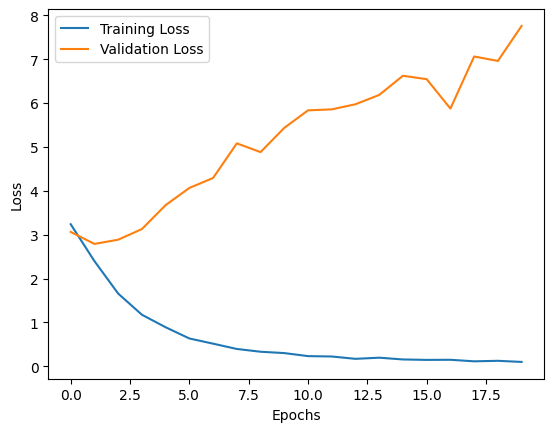

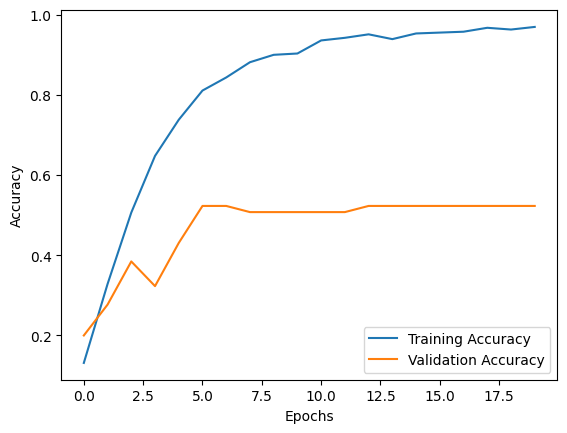

In [ ]:
# Plot grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot grafik akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/SavedModels/ModelCapstone.h5')

In [38]:
import os
import tensorflow as tf
from keras.models import load_model

model = load_model("my_model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()



In [41]:
tflite_file_path = '/content/model.tflite'
drive_save_path = '/content/drive/MyDrive/SavedModels/model.tflite'

In [42]:
!cp {tflite_file_path} {drive_save_path}

In [ ]:
model.save('my_model.h5')

NameError: ignored